In [1]:
%%html
<link rel="stylesheet" type="text/css" href="rise.css" />

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')
plt.rcParams['lines.markeredgecolor'] = 'w'
plt.rcParams['lines.markeredgewidth'] = 0.5
plt.rcParams['lines.markersize'] = 10
plt.rcParams['figure.figsize'] = [6, 5]

# Cross Validation
**Learning goals**
- You will be able to split your dataset up into training and testing sets.
- You will understand the difference between training error and testing error.
- You will appreciate that often the best model is the one that will generalize best to new data (i.e., has the lowest testing error, not the lowest training error).
- You will understand the concept of the "bias vs. variance" tradeoff.
- You will be able to perform K-fold cross validation.

Fit the following $x$ vs. $y$ data with a series of polynomial models from degree 1 to 5.

In [3]:
x = np.array([-1.51194917, -0.35259945, -0.62124083, -0.77317774,  1.72056723,
       -0.50984698, -0.20047849,  0.66310664, -0.5212926 ,  2.71761964,
        1.9592446 ,  0.62961848, -2.36181885,  0.96958729, -0.46035628,
        0.40432464, -0.26511359,  1.73803833, -0.19599021,  0.63550634,
       -0.90180419, -2.12003443, -1.82638057,  0.54310286,  2.61477581,
        1.09420987,  2.65622622,  2.05776625,  0.71981851,  1.66798961])
y = np.array([ 1.3602055 ,  0.30283751, -0.00732623,  1.10948672, -0.87715488,
       -2.04098251, -2.18897935, -1.47098137, -0.36907908,  1.21921831,
        1.15865001, -2.03247401,  3.28957677, -0.41322767, -1.90914743,
       -2.46896089, -0.74630152,  0.61039472, -1.70399713, -2.24478022,
       -0.47809011,  0.01491892,  3.20748631, -2.20110028, -0.85001201,
       -1.40306547,  0.95984563, -1.46952705, -1.88071034, -1.44336616])

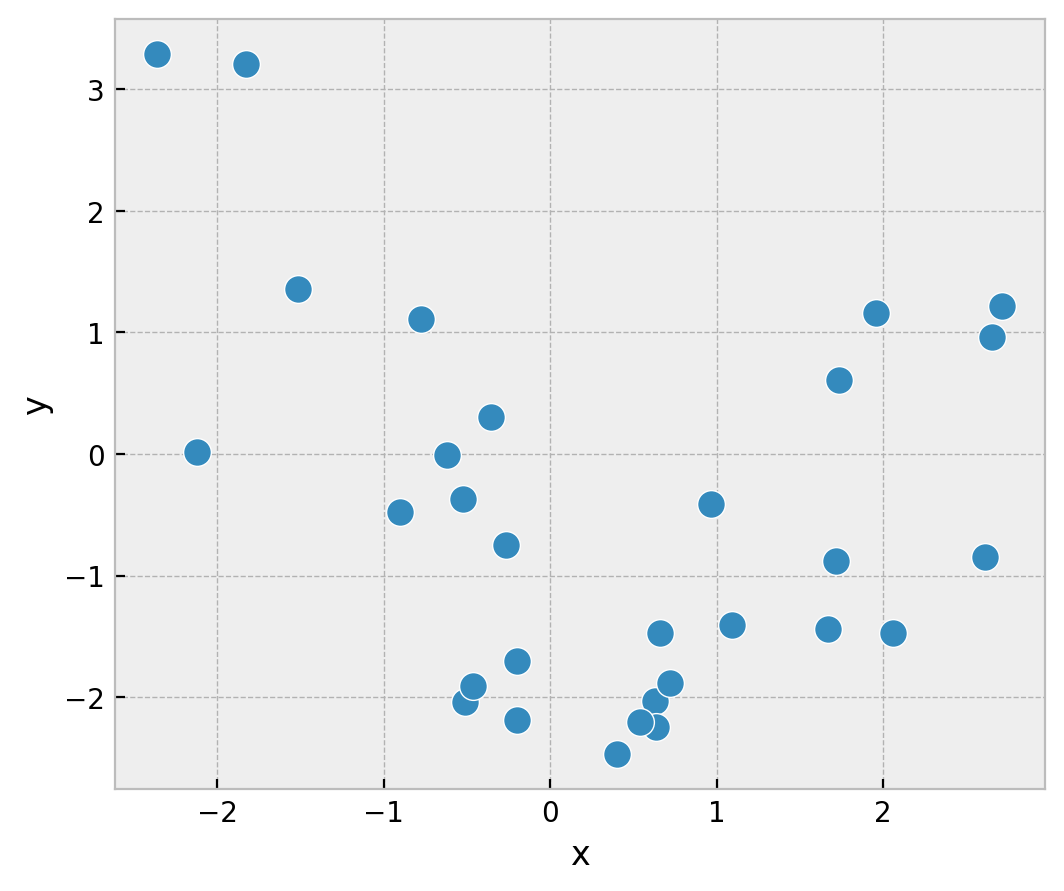

In [4]:
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y');

### Exercise
Fit the above $x$ vs. $y$ data with a series of polynomial models from degree 1 to 5.

In [5]:
# polynomial models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# reshape features for sklearn
X = x.reshape([-1,1])

# models = []
# Xpolys = []
# for degree in range(6):
#     # prepare the data
#     to_poly = ...
#     Xpoly = ...
    
#     # create model
#     model = ...
    
#     # fit model to x,y data
#     ...
    
#     # save model and polynomial transformed features
#     models.append(model)
#     Xpolys.append(Xpoly)

### Exercise Key
Fit the above $x$ vs. $y$ data with a series of polynomial models from degree 1 to 5.

In [6]:
# polynomial models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# reshape features for sklearn
X = x.reshape([-1,1])

models = []
Xpolys = []
for degree in range(1,6):
    # prepare the data
    to_poly = PolynomialFeatures(degree=degree, include_bias=False)
    Xpoly = to_poly.fit_transform(X)
    
    # create model
    model = LinearRegression()
    
    # fit model to x,y data
    model.fit(Xpoly, y)
    
    # save model and polynomial transformed features
    models.append(model)
    Xpolys.append(Xpoly)

In [7]:
models

[LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression(),
 LinearRegression()]

In [8]:
models[-1].__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 5,
 'coef_': array([-1.07470886,  1.01409936,  0.13937976, -0.08875265, -0.0032823 ]),
 'rank_': 5,
 'singular_': array([256.52078175,  59.07438852,   9.00113929,   2.58178218,
          1.77993634]),
 'intercept_': -1.5888085443579056}

In [9]:
Xpolys

[array([[-1.51194917],
        [-0.35259945],
        [-0.62124083],
        [-0.77317774],
        [ 1.72056723],
        [-0.50984698],
        [-0.20047849],
        [ 0.66310664],
        [-0.5212926 ],
        [ 2.71761964],
        [ 1.9592446 ],
        [ 0.62961848],
        [-2.36181885],
        [ 0.96958729],
        [-0.46035628],
        [ 0.40432464],
        [-0.26511359],
        [ 1.73803833],
        [-0.19599021],
        [ 0.63550634],
        [-0.90180419],
        [-2.12003443],
        [-1.82638057],
        [ 0.54310286],
        [ 2.61477581],
        [ 1.09420987],
        [ 2.65622622],
        [ 2.05776625],
        [ 0.71981851],
        [ 1.66798961]]),
 array([[-1.51194917,  2.28599029],
        [-0.35259945,  0.12432637],
        [-0.62124083,  0.38594017],
        [-0.77317774,  0.59780382],
        [ 1.72056723,  2.96035159],
        [-0.50984698,  0.25994394],
        [-0.20047849,  0.04019162],
        [ 0.66310664,  0.43971042],
        [-0.5212926 

Visualize all model fits.

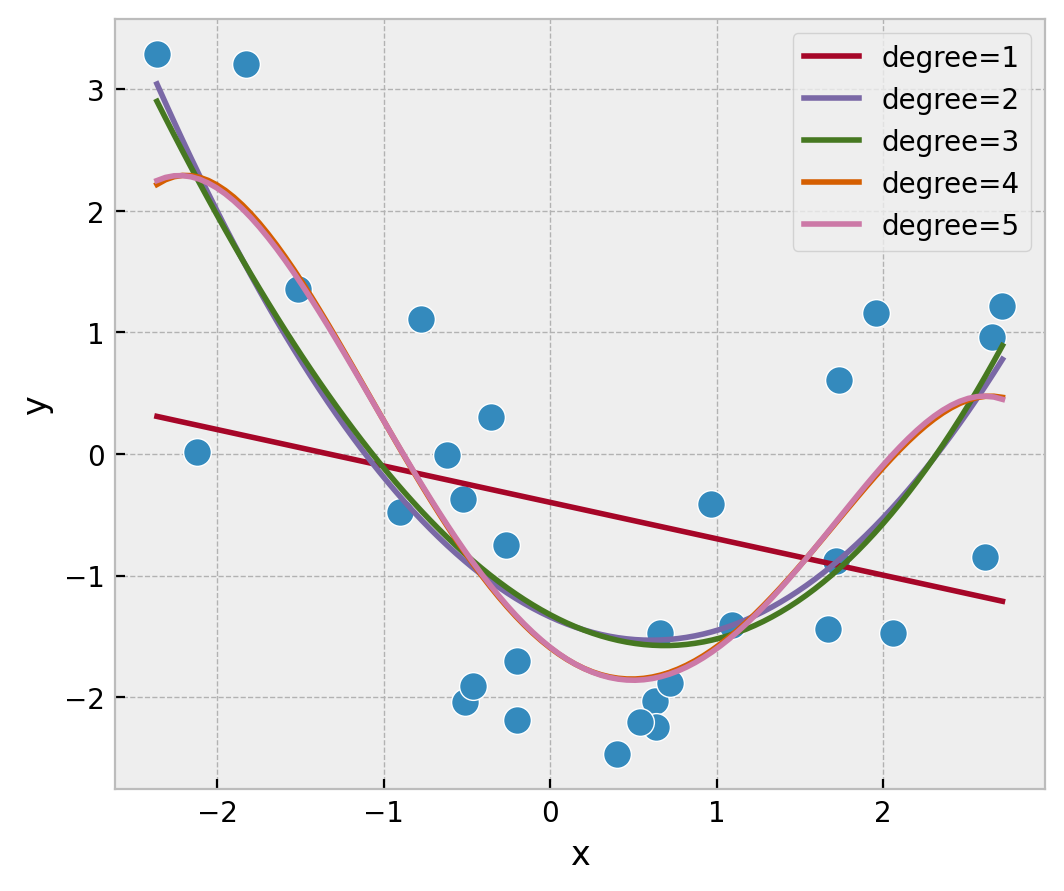

In [10]:
plt.plot(x, y, 'o')

Xrange = np.linspace(x.min(), x.max(), 100).reshape([-1,1])

for model in models:
    to_poly = PolynomialFeatures(degree=model.rank_, include_bias=False)
    Xpolyrange = to_poly.fit_transform(Xrange)
    plt.plot(Xrange, model.predict(Xpolyrange), label=f'degree={model.rank_}')

plt.xlabel('x')
plt.ylabel('y')
plt.legend();

### Exercise
Compute mean squared error ($MSE$) and $R^2$ for each model.

In [11]:
# MSE and R^2
MSE = []
R2 = []
# for model, Xpoly in zip(models, Xpolys):
#     residuals = ...
    
#     MSE.append(...)
#     R2.append(...)

### Exercise Key
Compute mean squared error ($MSE$) and $R^2$ for each model.

In [12]:
# MSE and R^2
MSE = []
R2 = []
for model, Xpoly in zip(models, Xpolys):
    residuals = y - model.predict(Xpoly)
    
    MSE.append(np.mean(residuals**2))
    R2.append(model.score(Xpoly, y))

Visualize the error for each model.

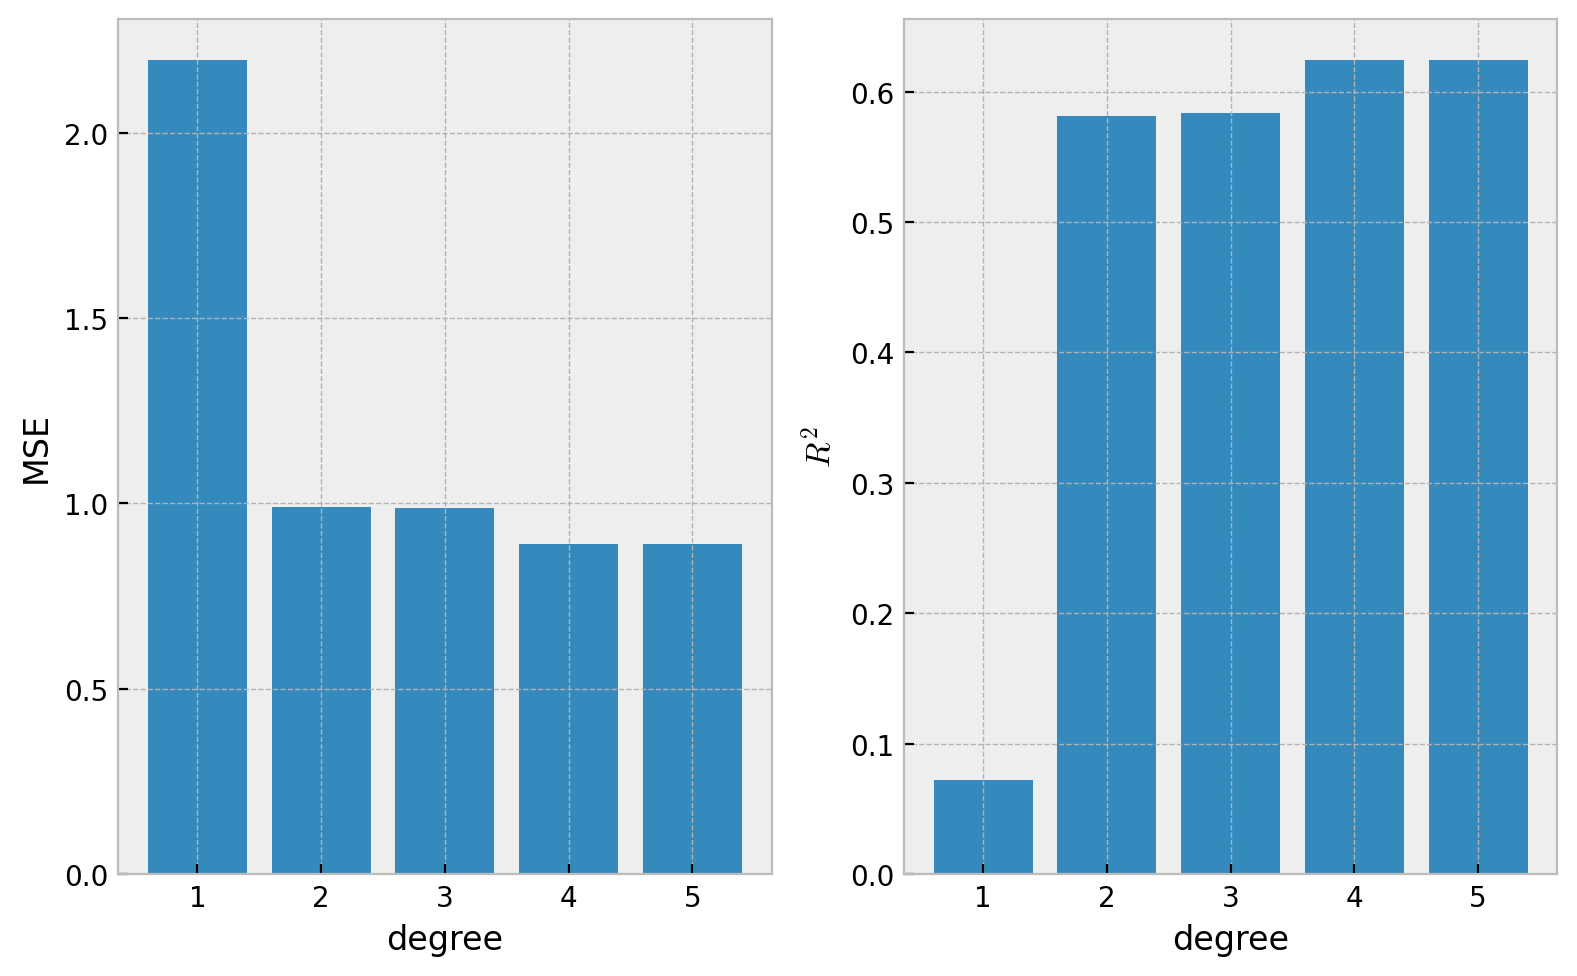

In [13]:
plt.figure(figsize=[8,5])
degrees = range(1, 6)
plt.subplot(1, 2, 1)
plt.bar(degrees, MSE)
plt.xlabel('degree')
plt.ylabel('MSE')
plt.subplot(1, 2, 2)
plt.bar(degrees, R2)
plt.xlabel('degree')
plt.ylabel(r'$R^2$')
plt.tight_layout();

You collect some new data that you'd like to test your model on.

In [14]:
x_test = np.array([ 2.28661918,  0.48763724,  2.29041217,  1.15518954,  1.35152568,
        0.00794629,  2.73650181,  0.8639412 , -0.45686971,  0.63835928,
       -2.88484081, -1.1905511 ,  0.96104122, -1.25953436,  0.70809257,
       -0.42738779, -2.18715561, -1.21030604,  0.41978946,  0.54523657])
y_test = np.array([ 2.80956706, -1.3438025 ,  0.09435006,  0.08933829, -1.79290739,
       -1.20542675,  3.69919231, -2.2725569 , -0.72032099, -1.30865004,
        9.58357284, -0.49143777, -1.73920281,  2.17234705, -2.90126534,
       -1.53958642,  4.53565175,  2.52441049, -1.57127151, -1.84049182])

In [15]:
X_test = x_test.reshape([-1,1])

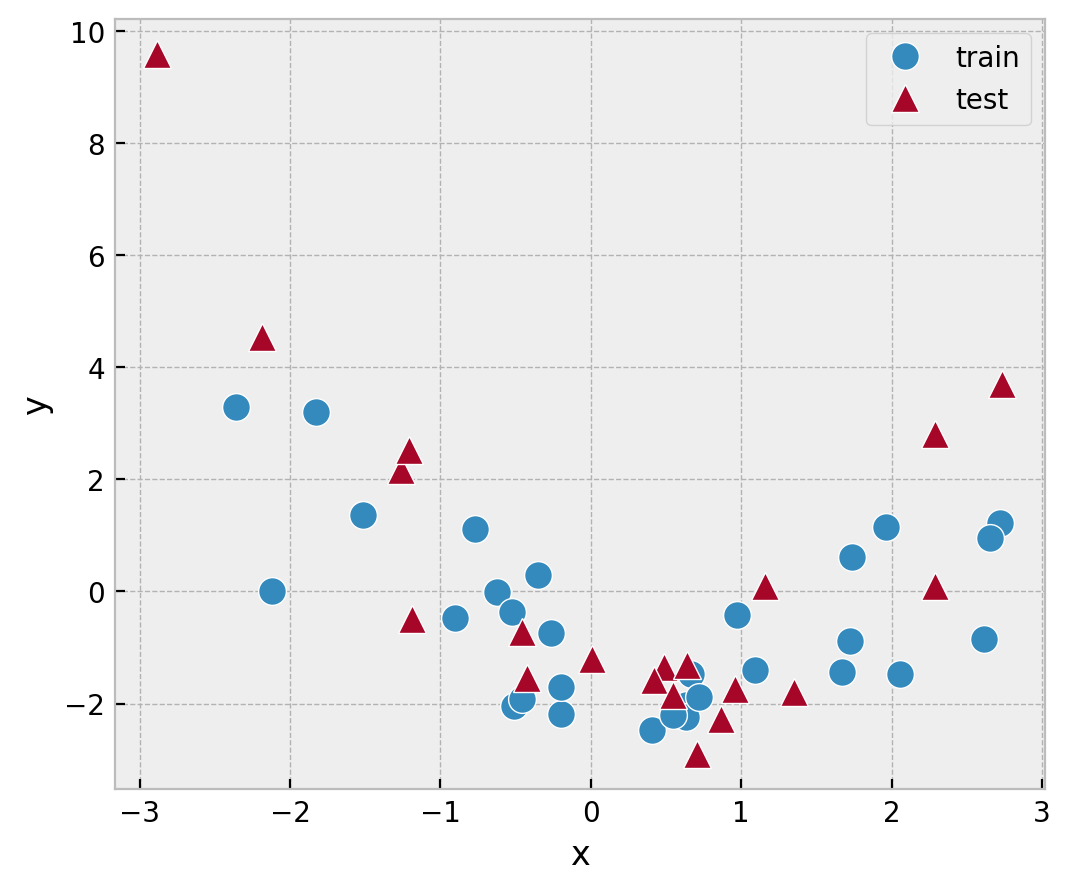

In [16]:
plt.plot(x, y, 'o', label='train')
plt.plot(x_test, y_test, '^', label='test')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

### Exercise
Compute mean squared error ($MSE$) and $R^2$ for each model on the new data which the model's were NOT trained on.

In [17]:
# test MSE and R^2
test_MSE = []
test_R2 = []

# for model in models:
#     # 1. transform X_test -> polynomial features...
#     to_poly = PolynomialFeatures(degree=model.rank_, include_bias=False)
#     Xpoly_test = ...

#     # 2. compute residuals...
#     residuals = ...

#     # 3. compute and store errors...
#     test_MSE.append(np.mean(residuals**2))
#     test_R2.append(model.score(Xpoly_test, y_test))

### Exercise key
Compute mean squared error ($MSE$) and $R^2$ for each model on the new data which the model's were NOT trained on.

In [18]:
# test MSE and R^2
test_MSE = []
test_R2 = []

for model in models:
    # 1. transform X_test -> polynomial features...
    to_poly = PolynomialFeatures(degree=model.rank_, include_bias=False)
    Xpoly_test = to_poly.fit_transform(X_test)

    # 2. compute residuals...
    residuals = y_test - model.predict(Xpoly_test)

    # 3. compute and store errors...
    test_MSE.append(np.mean(residuals**2))
    test_R2.append(model.score(Xpoly_test, y_test))

Visualize both the training and testing error for each model.

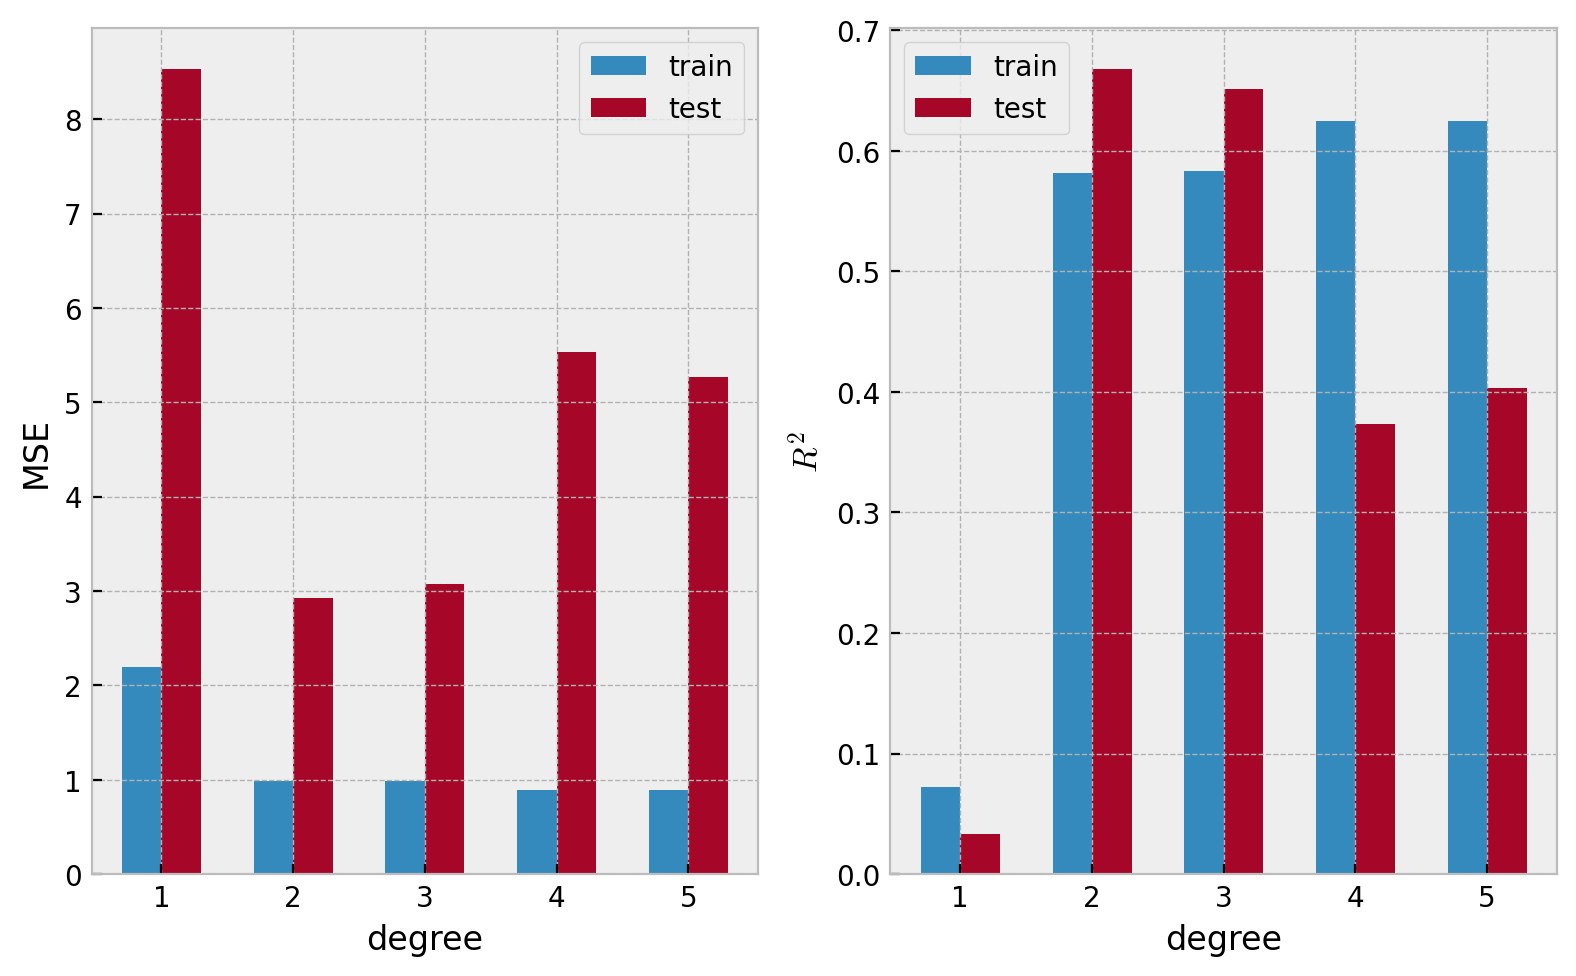

In [19]:
plt.figure(figsize=[8,5])
degrees = np.arange(1, 6)
plt.subplot(1, 2, 1)
plt.bar(degrees - 0.15, MSE, width=0.3, label='train')
plt.bar(degrees + 0.15, test_MSE, width=0.3, label='test')
plt.xlabel('degree')
plt.ylabel('MSE')
plt.legend()
plt.subplot(1, 2 ,2)
plt.bar(degrees - 0.15, R2, width=0.3, label='train')
plt.bar(degrees + 0.15, test_R2, width=0.3, label='test')
plt.xlabel('degree')
plt.ylabel(r'$R^2$')
plt.legend()
plt.tight_layout();

Visualize the model prediction overlaid on both training and testing data.

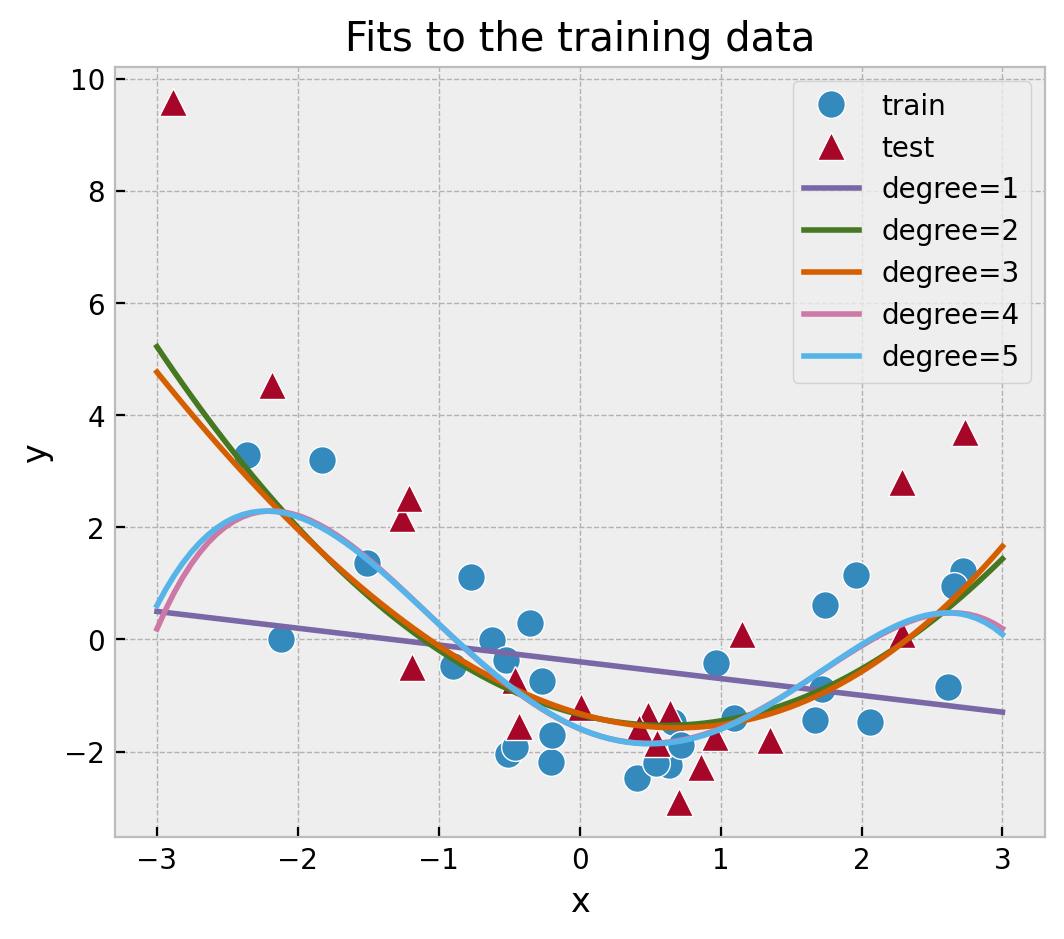

In [20]:
plt.plot(x, y, 'o', label='train')
plt.plot(x_test, y_test, '^', label='test')

Xrange = np.linspace(-3, 3, 100).reshape([-1,1])
for model in models:
    to_poly = PolynomialFeatures(degree=model.rank_, include_bias=False)
    Xpoly_range = to_poly.fit_transform(Xrange)
    plt.plot(Xrange, model.predict(Xpoly_range), label=f'degree={model.rank_}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fits to the training data')
plt.legend();

Combine training and testing data.

In [21]:
x = np.hstack([x, x_test])
y = np.hstack([y, y_test])

# reshape for sklearn
X = x.reshape([-1, 1])

x.shape, y.shape, X.shape

((50,), (50,), (50, 1))

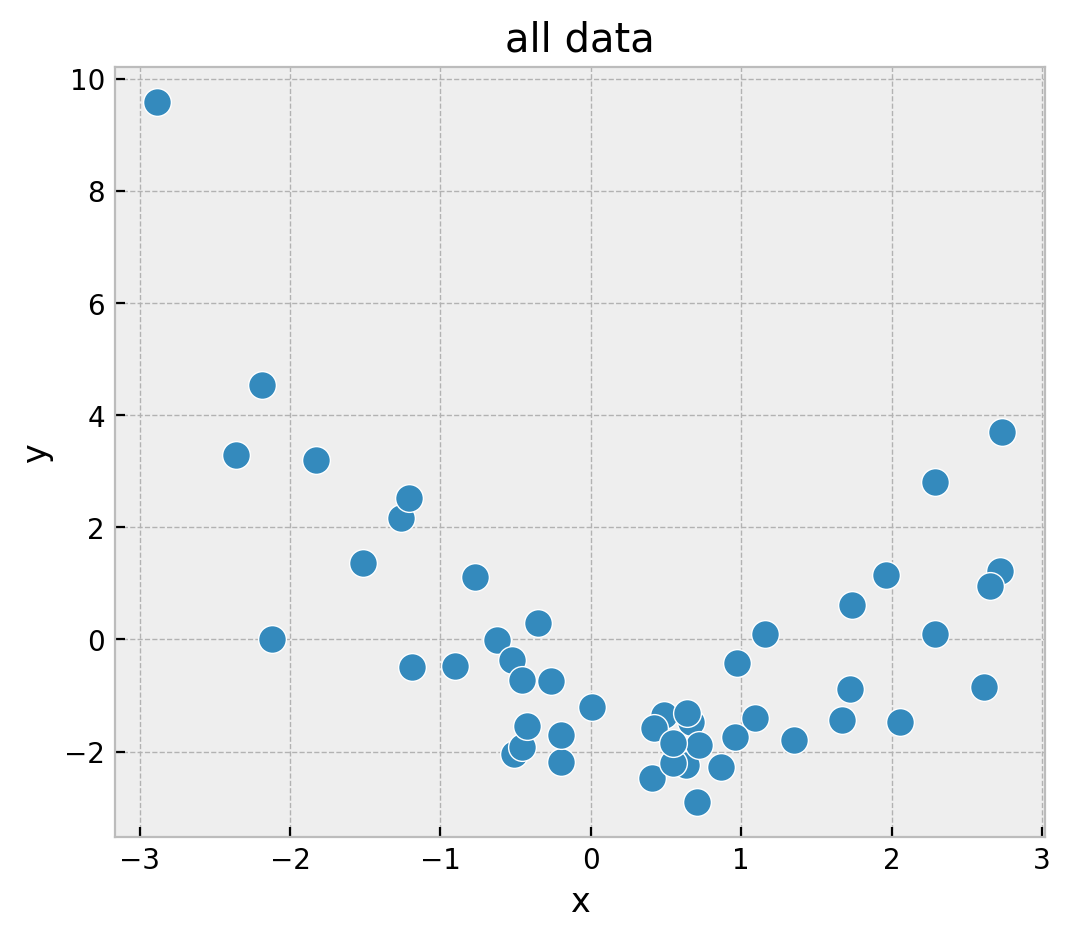

In [22]:
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('all data');

Split data into training and testing sets.

In [23]:
from sklearn.model_selection import train_test_split

# split data into train and test sets
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, shuffle=True, test_size=0.2, random_state=1)

X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50, 1), (50,), (40, 1), (40,), (10, 1), (10,))

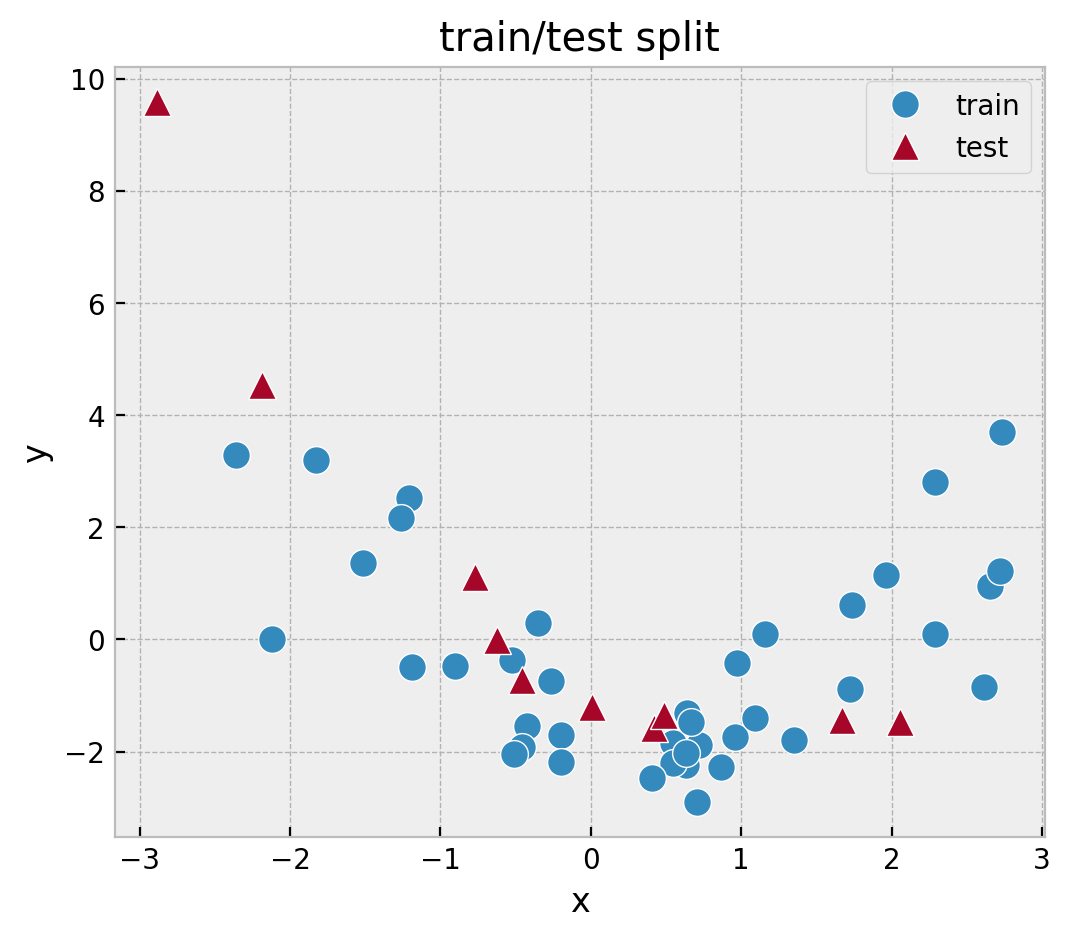

In [24]:
plt.plot(X_train, y_train, 'o', label='train')
plt.plot(X_test, y_test, '^', label='test')
plt.xlabel('x')
plt.ylabel('y')
plt.title('train/test split')
plt.legend();

Train each model on the training set and evaluate it's error on the test set.

In [25]:
def get_train_test_MSE(X_train, X_test, y_train, y_test):
    train_MSE = []
    test_MSE = []
    for degree in range(1,6):
        to_poly = PolynomialFeatures(degree=degree, include_bias=False)
        Xpoly_train = to_poly.fit_transform(X_train)
        Xpoly_test = to_poly.fit_transform(X_test)
        
        model = LinearRegression()
        model.fit(Xpoly_train, y_train)
        
        train_residuals = y_train - model.predict(Xpoly_train)
        test_residuals = y_test - model.predict(Xpoly_test)
        
        train_MSE.append(np.mean(train_residuals**2))
        test_MSE.append(np.mean(test_residuals**2))

    return train_MSE, test_MSE

In [26]:
train_MSE, test_MSE = get_train_test_MSE(X_train, X_test, y_train, y_test)

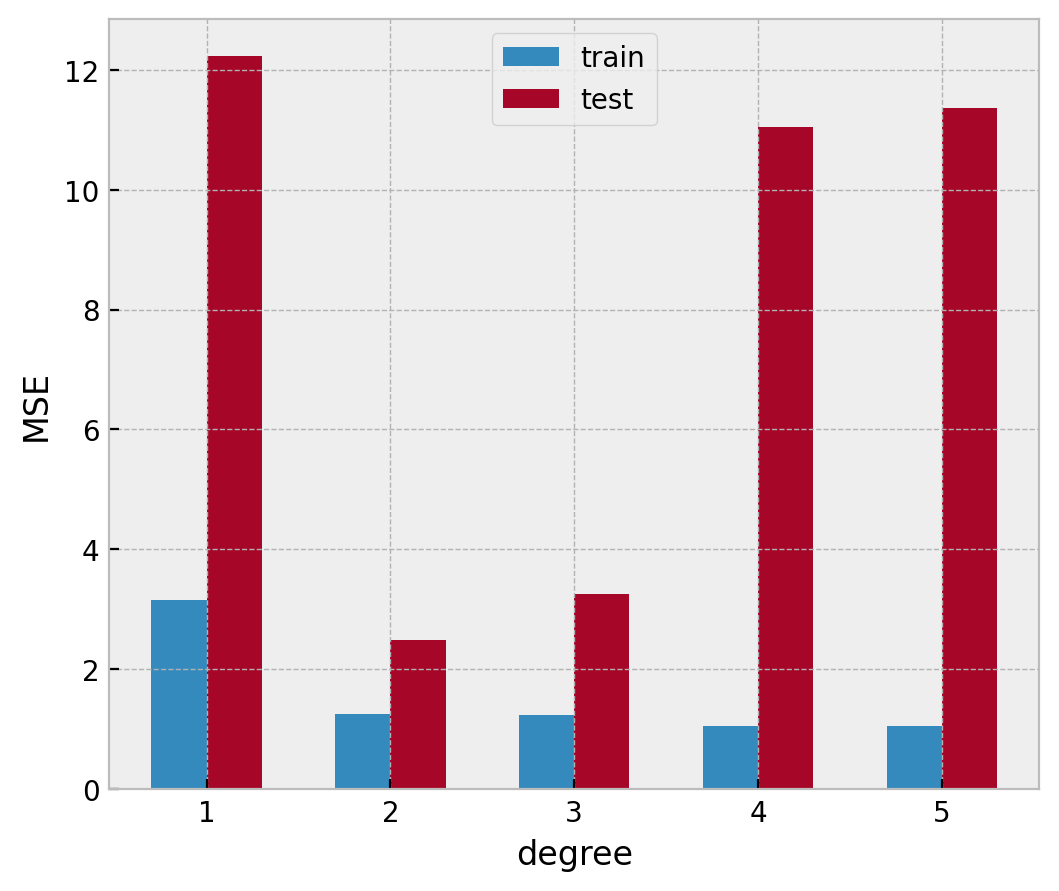

In [27]:
degrees = np.arange(1, 6)
plt.bar(degrees - 0.15, train_MSE, width=0.3, label='train')
plt.bar(degrees + 0.15, test_MSE, width=0.3, label='test')
plt.xlabel('degree')
plt.ylabel('MSE')
plt.legend();

How you split the data can matter!

Try different random train/test splits.

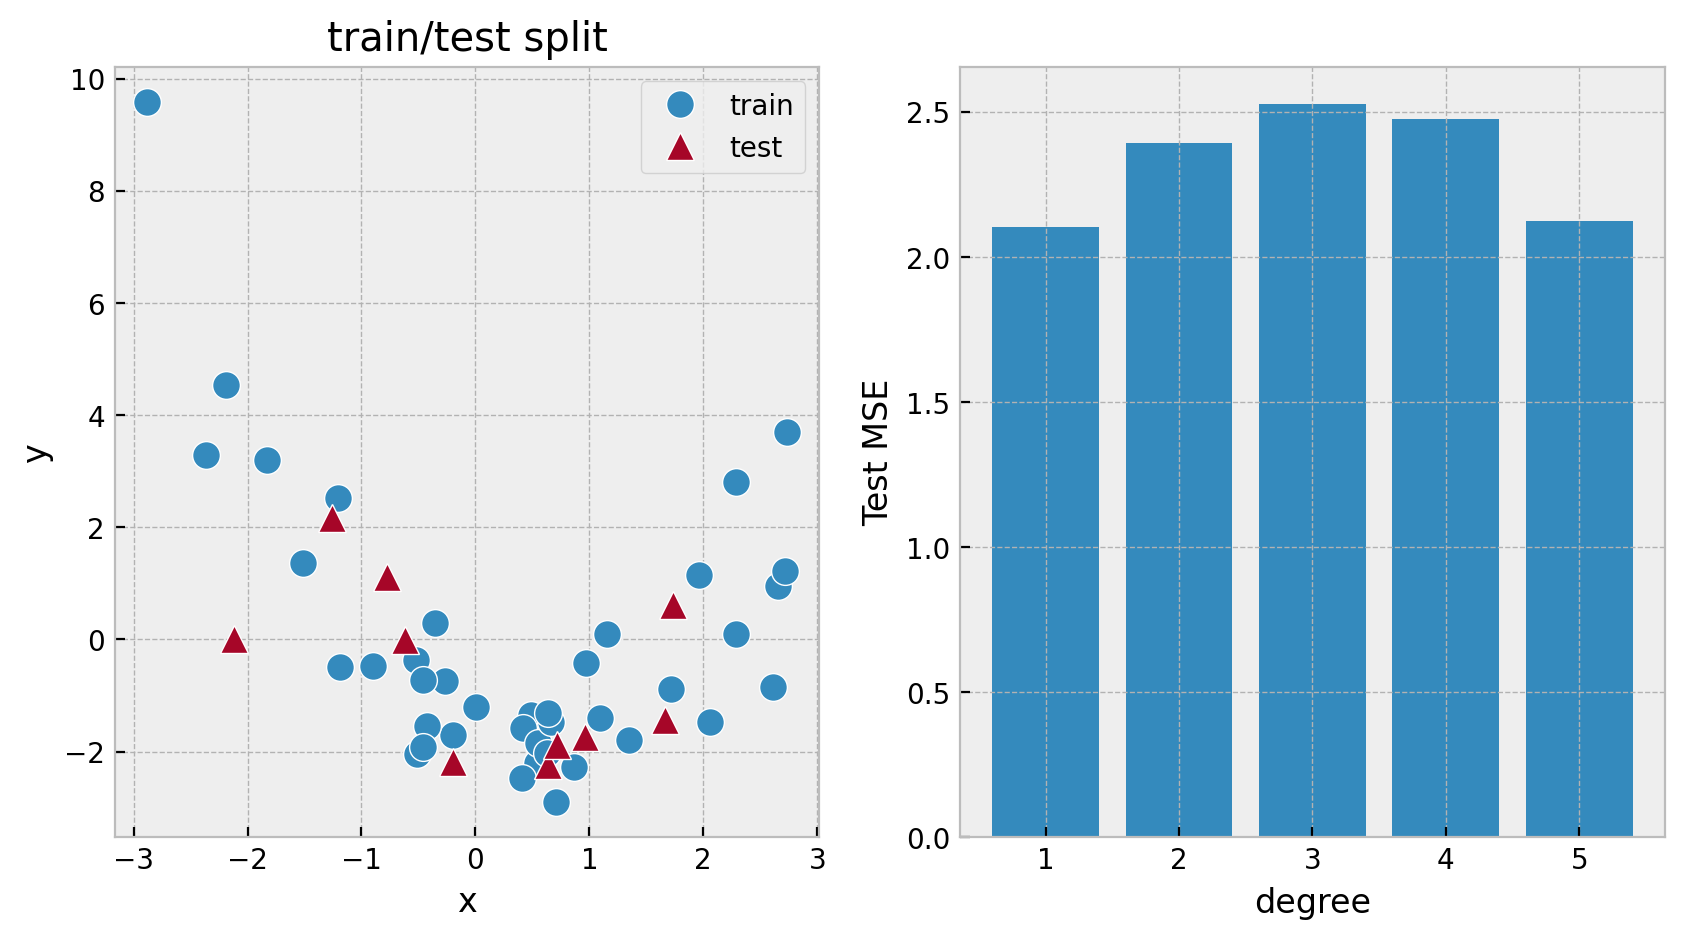

In [28]:
# train/test split <-- change random_state to get a different split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, shuffle=True, test_size=0.2, random_state=5)

train_MSE, test_MSE = get_train_test_MSE(X_train, X_test, y_train, y_test)

plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(X_train, y_train, 'o', label='train')
plt.plot(X_test, y_test, '^', label='test')
plt.xlabel('x')
plt.ylabel('y')
plt.title('train/test split')
plt.legend()

plt.subplot(122)
degrees = range(1, 6)
plt.bar(degrees, test_MSE)
plt.xlabel('degree')
plt.ylabel('Test MSE');

K-fold cross validation.

In [29]:
from sklearn.model_selection import KFold

X10 = np.random.random(10)
print(X10)

kf = KFold(n_splits=5, shuffle=True, random_state=0)

for train_indices, test_indices in kf.split(X10):
    print(train_indices, test_indices)

[0.47347191 0.75472573 0.05052413 0.57661481 0.80378239 0.33923443
 0.13427017 0.02512714 0.89972742 0.79253594]
[0 1 3 4 5 6 7 9] [2 8]
[0 1 2 3 5 6 7 8] [4 9]
[0 2 3 4 5 7 8 9] [1 6]
[0 1 2 4 5 6 8 9] [3 7]
[1 2 3 4 6 7 8 9] [0 5]


In [30]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

for train_indices, test_indices in kf.split(X):
    X_train = X[train_indices,:]
    y_train = y[train_indices]
    X_test = X[test_indices,:]
    y_test = y[test_indices]
    
    print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(40, 1) (40,) (10, 1) (10,)
(40, 1) (40,) (10, 1) (10,)
(40, 1) (40,) (10, 1) (10,)
(40, 1) (40,) (10, 1) (10,)
(40, 1) (40,) (10, 1) (10,)


Use 5-fold cross validation to evaluate how variable each of the models to different partitioning of the data into train/test sets.

In [31]:
cv_MSE = []
kf = KFold(n_splits=5, shuffle=True, random_state=0)

for train_indices, test_indices in kf.split(X):
    X_train = X[train_indices,:]
    y_train = y[train_indices]
    X_test = X[test_indices,:]
    y_test = y[test_indices]
    
    # Evaluate validation error for polynomial models from degree 1 to 6
    # given the train/test split for this fold.
    test_MSE = []
    for degree in range(1, 6):
        
        # preprocess data..
        to_poly = PolynomialFeatures(degree=degree, include_bias=False)
        Xpoly_train = to_poly.fit_transform(X_train)
        Xpoly_test = to_poly.fit_transform(X_test)

        # fit model..
        model = LinearRegression()
        model.fit(Xpoly_train, y_train)

        # compute and store validation error...
        test_residuals = y_test - model.predict(Xpoly_test)
        test_MSE.append(np.mean(test_residuals**2))
    
    cv_MSE.append(test_MSE)

In [32]:
cv_MSE = np.array(cv_MSE)
cv_MSE

array([[ 1.89316677,  0.64218023,  0.65857018,  0.65951342,  0.98748575],
       [ 2.82614822,  0.53581492,  0.50482427,  0.55801706,  0.83321843],
       [ 3.24713012,  1.09055546,  1.13822825,  1.32240721,  1.03377595],
       [11.20378155,  2.19070333,  3.80246197,  7.33116245, 14.65525916],
       [ 6.71826928,  2.71312084,  3.30867054,  3.44648608,  3.48930099]])

In [33]:
pd.DataFrame(cv_MSE, index=[f'Fold {i} Validation MSE' for i in range(5)], columns=[f'Degree {i}' for i in range(1, 6)])

,Degree 1,Degree 2,Degree 3,Degree 4,Degree 5
Fold 0 Validation MSE,1.893167,0.642180,0.658570,0.659513,0.987486
Fold 1 Validation MSE,2.826148,0.535815,0.504824,0.558017,0.833218
Fold 2 Validation MSE,3.247130,1.090555,1.138228,1.322407,1.033776
Fold 3 Validation MSE,11.203782,2.190703,3.802462,7.331162,14.655259
Fold 4 Validation MSE,6.718269,2.713121,3.308671,3.446486,3.489301


Compute the mean validation error across folds...

In [34]:
mean_cv_MSE = np.mean(cv_MSE, axis=0)

mean_cv_MSE

array([5.17769919, 1.43447496, 1.88255104, 2.66351725, 4.19980805])

In [35]:
pd.DataFrame(mean_cv_MSE.reshape([1,-1]), index=['Mean Validation MSE'], columns=[f'Degree {i}' for i in range(1, 6)])

,Degree 1,Degree 2,Degree 3,Degree 4,Degree 5
Mean Validation MSE,5.177699,1.434475,1.882551,2.663517,4.199808


Visualize cross validated MSE for each model.

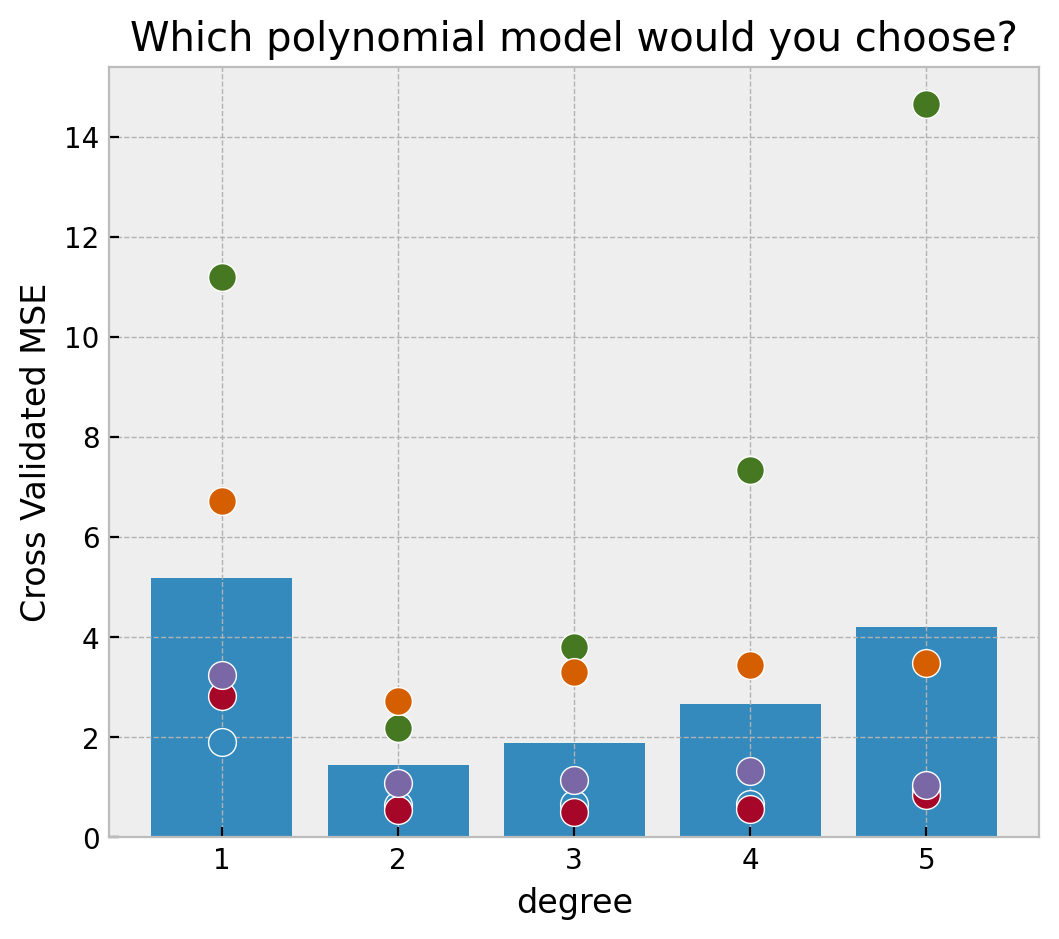

In [36]:
degrees = range(1, 6)
plt.bar(degrees, mean_cv_MSE)
plt.plot(degrees, cv_MSE.T, 'o')
plt.xlabel('degree')
plt.ylabel('Cross Validated MSE')
plt.title('Which polynomial model would you choose?');

K-fold cross validation wrapped up nice and neat for you in `cross_validate`.

In [37]:
from sklearn.model_selection import cross_validate

# features for 2nd degree polynomial model...
to_poly2 = PolynomialFeatures(degree=2, include_bias=False)
Xpoly2 = to_poly.fit_transform(X)

# 2nd degree polynomial model is just a linear model...
model = LinearRegression()

# 5-fold cross validation...
cv_results = cross_validate(model, Xpoly2, y, cv=5)

# test scores for each fold...
cv_results['test_score']

array([ 0.5534927 ,  0.64105083, -0.44150915,  0.37982347,  0.3633826 ])

5-fold cross validation for all models.

In [38]:
cv_MSE = []  # models x folds

for degree in range(1, 6):
    # X -> Xpoly
    to_poly = PolynomialFeatures(degree=degree, include_bias=False)
    Xpoly = to_poly.fit_transform(X)
    
    # !!! Use the same random_state to get the same split for each model.
    #     Otherwise you are not treating each model the same.
    kf = KFold(n_splits=5, shuffle=True, random_state=0)

    # cross validation
    model = LinearRegression()
    cv_results = cross_validate(model, Xpoly, y, cv=kf, scoring='neg_mean_squared_error')
    
    cv_MSE.append(-cv_results['test_score'])

cv_MSE = np.array(cv_MSE)
cv_MSE

array([[ 1.89316677,  2.82614822,  3.24713012, 11.20378155,  6.71826928],
       [ 0.64218023,  0.53581492,  1.09055546,  2.19070333,  2.71312084],
       [ 0.65857018,  0.50482427,  1.13822825,  3.80246197,  3.30867054],
       [ 0.65951342,  0.55801706,  1.32240721,  7.33116245,  3.44648608],
       [ 0.98748575,  0.83321843,  1.03377595, 14.65525916,  3.48930099]])

What if you want to see both the testing and training errors?

In [39]:
cv_train_MSE = []  # models x folds
cv_test_MSE = []  # models x folds

for degree in range(1, 6):
    # X -> Xpoly
    to_poly = PolynomialFeatures(degree=degree, include_bias=False)
    Xpoly = to_poly.fit_transform(X)
    
    # !!! Use the same random_state to get the same split for each model.
    #     Otherwise you are not treating each model the same.
    kf = KFold(n_splits=5, shuffle=True, random_state=0)
    
    # cross validation
    model = LinearRegression()
    cv_results = cross_validate(model, Xpoly, y, cv=kf, scoring='neg_mean_squared_error', 
                                return_train_score=True)
    
    cv_train_MSE.append(-cv_results['train_score'])
    cv_test_MSE.append(-cv_results['test_score'])

cv_train_MSE = np.array(cv_train_MSE)
cv_test_MSE = np.array(cv_test_MSE)

cv_train_MSE, cv_test_MSE

(array([[5.13921705, 4.96255731, 4.82608295, 3.13040262, 3.99787615],
        [1.49059818, 1.51935197, 1.39386471, 1.14463325, 0.9976143 ],
        [1.47372163, 1.51574484, 1.36943751, 1.0855929 , 0.89961148],
        [1.45479851, 1.48887867, 1.31906599, 1.04675083, 0.89716402],
        [1.24327145, 1.27270498, 1.2208814 , 1.03367446, 0.79888766]]),
 array([[ 1.89316677,  2.82614822,  3.24713012, 11.20378155,  6.71826928],
        [ 0.64218023,  0.53581492,  1.09055546,  2.19070333,  2.71312084],
        [ 0.65857018,  0.50482427,  1.13822825,  3.80246197,  3.30867054],
        [ 0.65951342,  0.55801706,  1.32240721,  7.33116245,  3.44648608],
        [ 0.98748575,  0.83321843,  1.03377595, 14.65525916,  3.48930099]]))

Plot mean validation error vs. polynomial degree.

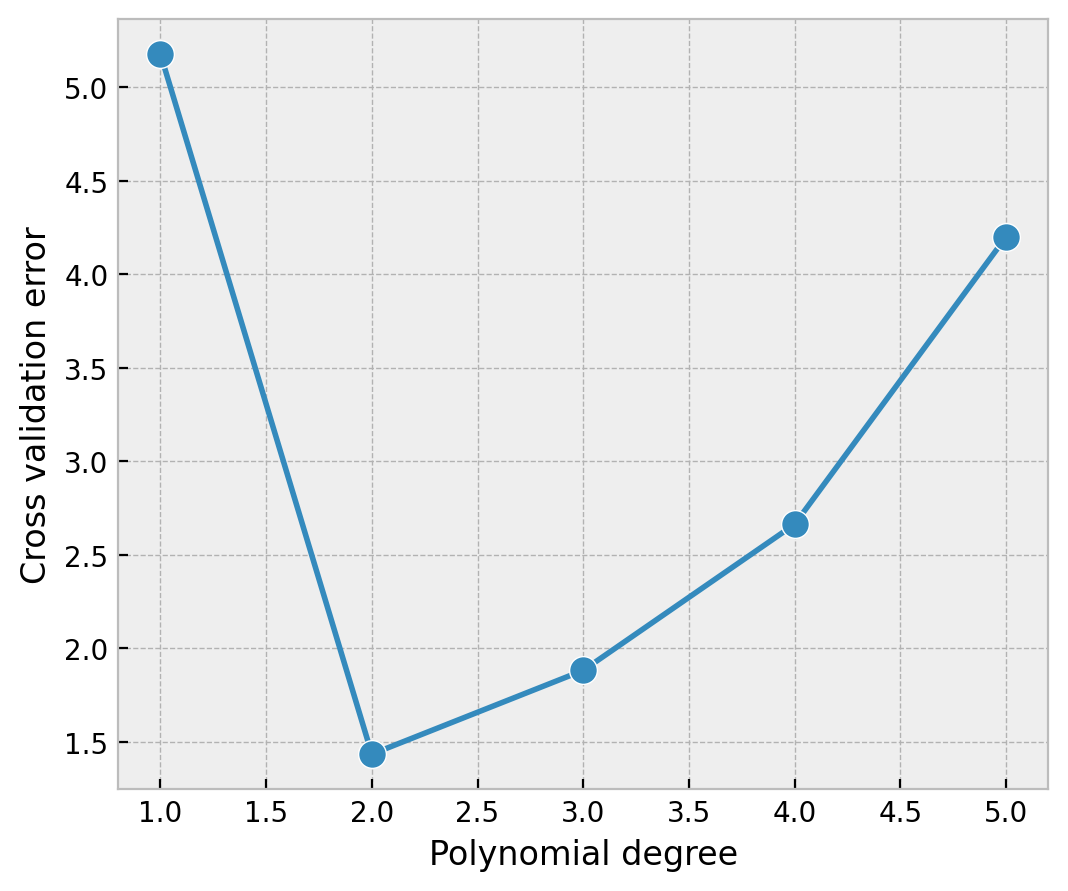

In [42]:
cv_error = np.mean(cv_test_MSE, axis=1)
degree = np.arange(1, 6)

plt.plot(degree, cv_error, 'o-')
plt.xlabel('Polynomial degree')
plt.ylabel('Cross validation error');

Programatically find the best model (i.e., with the lowest cross validated error).

In [44]:
i = np.argmin(cv_error)

degree[i], cv_error[i]

(2, 1.4344749567335462)